## Exploratory

In [ ]:
im

In [1]:
df_merged = pd.read_csv('../../small_business/data/reviews.csv')
reviews_only = df_merged[['restaurant_name', 'comment_ratings', 'year', 'type', 'review_count', 'price', 'neighborhood']]
reviews_only

NameError: name 'pd' is not defined

In [ ]:
test = reviews_only.groupby('neighborhood').agg({'comment_ratings':'mean','restaurant_name':'unique'}).sort_values(by='comment_ratings')
test['restaurant_name'] = [len(i) for i in test['restaurant_name']]
test

,comment_ratings,restaurant_name
neighborhood,,
São Domingos de Benfica,3.541667,1
Alvalade,3.750000,1
Santa Justa,3.891560,21
São Nicolau,4.033535,24
Almargem do Bispo,4.128571,1
Sacramento,4.134194,27
Mártires,4.182032,18
Castelo,4.189744,4
Santa Isabel,4.215877,24


In [ ]:
test = reviews_only.groupby('neighborhood').agg({'comment_ratings':'mean'}).sort_values(by='comment_ratings')
test

,comment_ratings
neighborhood,
São Domingos de Benfica,3.541667
Alvalade,3.750000
Santa Justa,3.891560
São Nicolau,4.033535
Almargem do Bispo,4.128571
Sacramento,4.134194
Mártires,4.182032
Castelo,4.189744
Santa Isabel,4.215877


In [ ]:
def plot_reviews(restaurant=None, neighborhood=None, type_rest=None, price=None):
    
    figsize=(10,4)
    color_bars = 'blue'
    
    shift_to_x = 0.3
    color_values = 'white'
    ha = 'center'
    size_values = 20
    
    linewidth = 5
    c='r'

    if restaurant == None and neighborhood == None and type_rest == None and price == None:
        rating = list(reviews_only.groupby('year').agg({'comment_ratings':'mean'}).values)
        review_count = list(reviews_only.groupby('year').agg({'review_count':'count'}).values)
        plt.figure(figsize=figsize)
        x = [int(i) for i in reviews_only.groupby('year').agg({'comment_ratings':'mean'}).index]
        y = [int(i) for i in reviews_only.groupby('year').agg({'comment_ratings':'mean'}).values]
        g=sns.barplot(x=x, y=y, color=color_bars)
        for i in range(len(y)):
            g.text(i, 
                   shift_to_x, 
                   int(rating[i][0]), 
                   color=color_values, 
                   ha=ha, 
                   size=size_values)
        plt.plot(5*(review_count/sum(review_count)), c=c, linewidth=linewidth)
        plt.title(f'Restaurant : {restaurant}')
        plt.xticks(rotation=90);    
    
    
    if restaurant != None:
        rating = list(reviews_only[reviews_only['restaurant_name'].isin(restaurant)].groupby('year').agg({'comment_ratings':'mean'}).values)
        review_count = list(reviews_only[reviews_only['restaurant_name'].isin(restaurant)].groupby('year').agg({'review_count':'count'}).values)
        plt.figure(figsize=figsize)
        x = [int(i) for i in reviews_only[reviews_only['restaurant_name'].isin(restaurant)].groupby('year').agg({'comment_ratings':'mean'}).index]
        y = [int(i) for i in reviews_only[reviews_only['restaurant_name'].isin(restaurant)].groupby('year').agg({'comment_ratings':'mean'}).values]
        g=sns.barplot(x=x, y=y, color=color_bars)
        for i in range(len(y)):
            g.text(i, 
                   shift_to_x, 
                   int(rating[i][0]), 
                   color=color_values, 
                   ha=ha, 
                   size=size_values)
        plt.plot(5*(review_count/sum(review_count)), c=c, linewidth=linewidth)
        plt.title(f'Restaurant : {restaurant}')
        plt.xticks(rotation=90);
    
    if neighborhood != None:
        rating = list(reviews_only[reviews_only['neighborhood'].isin(neighborhood)].groupby('year').agg({'comment_ratings':'mean'}).values)
        review_count = list(reviews_only[reviews_only['neighborhood'].isin(neighborhood)].groupby('year').agg({'review_count':'count'}).values)
        plt.figure(figsize=figsize)
        x = [int(i) for i in reviews_only[reviews_only['neighborhood'].isin(neighborhood)].groupby('year').agg({'comment_ratings':'mean'}).index]
        y = [int(i) for i in reviews_only[reviews_only['neighborhood'].isin(neighborhood)].groupby('year').agg({'comment_ratings':'mean'}).values]
        g=sns.barplot(x=x, y=y, color=color_bars)
        for i in range(len(y)):
            g.text(i, 
                   shift_to_x, 
                   int(rating[i][0]), 
                   color=color_values, 
                   ha=ha, 
                   size=size_values)
        plt.plot(5*(review_count/sum(review_count)), c=c, linewidth=linewidth)
        plt.title(f'Neighborhood : {neighborhood}')
        plt.xticks(rotation=90);

    if type_rest != None:
        rating = list(reviews_only[reviews_only['type'].isin(type_rest)].groupby('year').agg({'comment_ratings':'mean'}).values)
        review_count = list(reviews_only[reviews_only['type'].isin(type_rest)].groupby('year').agg({'review_count':'count'}).values)        
        plt.figure(figsize=figsize)
        x = [int(i) for i in reviews_only[reviews_only['type'].isin(type_rest)].groupby('year').agg({'comment_ratings':'mean'}).index]
        y = [int(i) for i in reviews_only[reviews_only['type'].isin(type_rest)].groupby('year').agg({'comment_ratings':'mean'}).values]
        g=sns.barplot(x=x, y=y, color=color_bars)
        for i in range(len(y)):
            g.text(i, 
                   shift_to_x, 
                   int(rating[i][0]), 
                   color=color_values, 
                   ha=ha, 
                   size=size_values)
        plt.plot(5*(review_count/sum(review_count)), c=c, linewidth=linewidth)
        plt.title(f'Type : {type_rest}')
        plt.xticks(rotation=90);
        
    if price != None:
        rating = list(reviews_only[reviews_only['price'].isin(price)].groupby('year').agg({'comment_ratings':'mean'}).values)
        review_count = list(reviews_only[reviews_only['price'].isin(price)].groupby('year').agg({'review_count':'count'}).values)        
        plt.figure(figsize=figsize)
        x = [int(i) for i in reviews_only[reviews_only['price'].isin(price)].groupby('year').agg({'comment_ratings':'mean'}).index]
        y = [int(i) for i in reviews_only[reviews_only['price'].isin(price)].groupby('year').agg({'comment_ratings':'mean'}).values]
        g=sns.barplot(x=x, y=y, color=color_bars)
        for i in range(len(y)):
            g.text(i, 
                   shift_to_x, 
                   int(rating[i][0]), 
                   color=color_values, 
                   ha=ha, 
                   size=size_values)
        plt.plot(5*(review_count/sum(review_count)), c=c, linewidth=linewidth)
        plt.title(f'Price : {price}')
        plt.xticks(rotation=90);

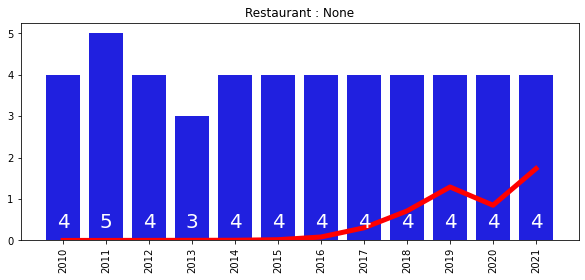

In [701]:
restaurant = None
neighborhood = None
type_rest = None
price = None

#restaurant = [i for i in reviews_only['restaurant_name'].unique()]
#eighborhood = ['Santa Justa']
#type_rest = ['brunch']
#price = [1]

plot_reviews(restaurant, neighborhood, type_rest, price)